In [44]:
# https://towardsdatascience.com/lstm-time-series-forecasting-predicting-stock-prices-using-an-lstm-model-6223e9644a2f

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
goal = "ETH-USD"
data = web.DataReader(goal, 'yahoo')

In [45]:
data.reset_index(level=0, inplace=True)

In [46]:
training_set = data.iloc[:800, 1:2].values
test_set = data.iloc[800:, 1:2].values

In [47]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-50:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [48]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Train on 740 samples
Epoch 1/100
740/740 [==============================] - 1s 1ms/sample - loss: 0.0215
Epoch 2/100
740/740 [==============================] - 1s 2ms/sample - loss: 0.0074
Epoch 3/100
740/740 [==============================] - 1s 2ms/sample - loss: 0.0053
Epoch 4/100
740/740 [==============================] - 1s 2ms/sample - loss: 0.0059
Epoch 5/100
740/740 [==============================] - 1s 2ms/sample - loss: 0.0051
Epoch 6/100
740/740 [==============================] - 1s 2ms/sample - loss: 0.0055
Epoch 7/100
740/740 [==============================] - 1s 2ms/sample - loss: 0.0045
Epoch 8/100
740/740 [==============================] - 1s 2ms/sample - loss: 0.0036
Epoch 9/100
740/740 [==============================] - 1s 2ms/sample - loss: 0.0039
Epoch 10/100
740/740 [==============================] - 1s 2ms/sample - loss: 0.0025
Epoch 11/100
740/740 [==============================] - 1s 2ms/sample - loss: 0.0027
Epoch 12/100
740/740 [==============================]

740/740 [==============================] - 1s 2ms/sample - loss: 0.0015
Epoch 98/100
740/740 [==============================] - 1s 2ms/sample - loss: 0.0015
Epoch 99/100
740/740 [==============================] - 1s 2ms/sample - loss: 0.0015
Epoch 100/100
740/740 [==============================] - 1s 2ms/sample - loss: 0.0015


In [49]:
# Getting the predicted stock price of 2017
dataset_train = data.iloc[:800, 1:2]
dataset_test = data.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-50:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(1025, 50, 1)


In [50]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [51]:
len(predicted_stock_price)

1025

In [52]:
len(data.loc[860:, 'Date'])

965

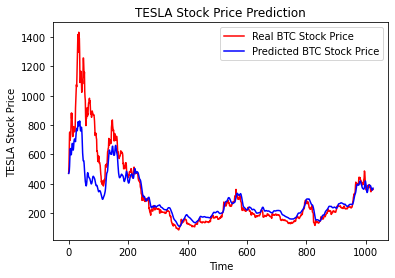

In [53]:
# Visualising the results
plt.plot(dataset_test.values, color = 'red', label = 'Real BTC Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted BTC Stock Price')
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()